In [248]:
import mysql.connector
import random
import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from plotly import express as px
import plotly.graph_objects as go

## DATA ADQUISITION FROM **DDBB**

In [2]:
pwd = ''
host = "localhost"
user = "root"

mydb = mysql.connector.connect(
    host = host,
    user = user,
    password = pwd,
    database = 'Crypto_Punks'
)

print(mydb)

InterfaceError: 2003: Can't connect to MySQL server on 'localhost:3306' (61 Connection refused)

In [ ]:
sql = """
SELECT * 
FROM transactions t
JOIN Punks p ON t.punk_id = p.id
"""

trans = pd.read_sql(sql, con=mydb) #Aquest metode genera el dataframe indicant el statement SQL i el conector
trans

,index,id,punk_id,trans_type,from,to,amount_ether,amount_$,date,id,rarity,type,skin,traits
0,0,0xdd0b90,1,Bid withdrawn,0xE1E492,,10.00,33222.10,2021-08-13,1,4352.0,Male,Dark,"['Mohawk', 'Smile']"
1,1,0x919480,1,Bid,0xE1E492,,10.00,30434.10,2021-08-12,1,4352.0,Male,Dark,"['Mohawk', 'Smile']"
2,10,0x58aa9e,1,Offer withdrawn,,,0.00,0.00,2020-09-14,1,4352.0,Male,Dark,"['Mohawk', 'Smile']"
3,100,0xbc175b,3,Bid,0x717403,,0.06,16.36,2017-06-26,3,7896.0,Male,Dark,"['NerdGlasses', 'Pipe', 'WildHair']"
4,1000,0x1a9155,138,Offered,,,47.49,149903.00,2021-08-16,138,9806.0,Male,Light,"['HornedRimGlasses', 'StringyHair']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166396,99995,0x744cf5,6400,Bid withdrawn,0x034B46,,55.00,121639.00,2021-04-24,6400,4925.0,Male,Dark,"['Hoodie', 'Pipe']"
166397,99996,0x78c940,6400,Bid,0x034B46,,55.00,129997.00,2021-04-23,6400,4925.0,Male,Dark,"['Hoodie', 'Pipe']"
166398,99997,0xdb33c7,6400,Offered,,,86.00,183984.00,2021-04-12,6400,4925.0,Male,Dark,"['Hoodie', 'Pipe']"
166399,99998,0xb8c5f4,6400,Offered,,,75.00,155408.00,2021-04-09,6400,4925.0,Male,Dark,"['Hoodie', 'Pipe']"


## **MODIFYING** THE DATAFRAME FOR THE NEEDS

### Transactions Dataframe

In [ ]:
# Renaming and dropping repeated attributes
trans.rename(columns={trans.columns[1]:'trans_id'}, inplace=True)
trans.drop(columns=trans.columns[9], inplace=True)
trans

,index,punk_id,trans_type,from,to,amount_ether,amount_$,date,rarity,type,skin,traits
0,0,1,Bid withdrawn,0xE1E492,,10.00,33222.10,2021-08-13,4352.0,Male,Dark,"['Mohawk', 'Smile']"
1,1,1,Bid,0xE1E492,,10.00,30434.10,2021-08-12,4352.0,Male,Dark,"['Mohawk', 'Smile']"
2,10,1,Offer withdrawn,,,0.00,0.00,2020-09-14,4352.0,Male,Dark,"['Mohawk', 'Smile']"
3,100,3,Bid,0x717403,,0.06,16.36,2017-06-26,7896.0,Male,Dark,"['NerdGlasses', 'Pipe', 'WildHair']"
4,1000,138,Offered,,,47.49,149903.00,2021-08-16,9806.0,Male,Light,"['HornedRimGlasses', 'StringyHair']"
...,...,...,...,...,...,...,...,...,...,...,...,...
166396,99995,6400,Bid withdrawn,0x034B46,,55.00,121639.00,2021-04-24,4925.0,Male,Dark,"['Hoodie', 'Pipe']"
166397,99996,6400,Bid,0x034B46,,55.00,129997.00,2021-04-23,4925.0,Male,Dark,"['Hoodie', 'Pipe']"
166398,99997,6400,Offered,,,86.00,183984.00,2021-04-12,4925.0,Male,Dark,"['Hoodie', 'Pipe']"
166399,99998,6400,Offered,,,75.00,155408.00,2021-04-09,4925.0,Male,Dark,"['Hoodie', 'Pipe']"


In [ ]:
# Generating dummy values from the attribute 'traits'
# =======================================================

trans['traits'] = trans['traits'].str[1:-1] # eliminamos los [] de la lista de atributos
dummies = pd.Series(trans['traits']).str.get_dummies(sep=', ') # Convertimos la lista de atributos en una dummy table.
dummies

,'','Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob','BlondeShort','BlueEyeShadow','BuckTeeth',...,'TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair'
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Joining the main dataframe with the dummy values
trans_dummies = trans.join(dummies)
trans_dummies.drop(columns=trans_dummies.columns[12], inplace = True)
trans_dummies

,index,punk_id,trans_type,from,to,amount_ether,amount_$,date,rarity,type,...,'TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair'
0,0,1,Bid withdrawn,0xE1E492,,10.00,33222.10,2021-08-13,4352.0,Male,...,0,0,0,0,0,0,0,0,0,0
1,1,1,Bid,0xE1E492,,10.00,30434.10,2021-08-12,4352.0,Male,...,0,0,0,0,0,0,0,0,0,0
2,10,1,Offer withdrawn,,,0.00,0.00,2020-09-14,4352.0,Male,...,0,0,0,0,0,0,0,0,0,0
3,100,3,Bid,0x717403,,0.06,16.36,2017-06-26,7896.0,Male,...,0,0,0,0,0,0,0,0,1,0
4,1000,138,Offered,,,47.49,149903.00,2021-08-16,9806.0,Male,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166396,99995,6400,Bid withdrawn,0x034B46,,55.00,121639.00,2021-04-24,4925.0,Male,...,0,0,0,0,0,0,0,0,0,0
166397,99996,6400,Bid,0x034B46,,55.00,129997.00,2021-04-23,4925.0,Male,...,0,0,0,0,0,0,0,0,0,0
166398,99997,6400,Offered,,,86.00,183984.00,2021-04-12,4925.0,Male,...,0,0,0,0,0,0,0,0,0,0
166399,99998,6400,Offered,,,75.00,155408.00,2021-04-09,4925.0,Male,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Generating the tarit counts of each punk
data = []
for i in range(len(trans_dummies)):
    data.append(trans_dummies.iloc[i,12:].sum(axis=0))

trans_dummies.insert(12, 'traits_counts', data) # Inserting the generated values on the dataframe
trans_dummies.iloc[:,:15]

,index,punk_id,trans_type,from,to,amount_ether,amount_$,date,rarity,type,skin,traits,traits_counts,'Bandana','Beanie'
0,0,1,Bid withdrawn,0xE1E492,,10.00,33222.10,2021-08-13,4352.0,Male,Dark,"'Mohawk', 'Smile'",2,0,0
1,1,1,Bid,0xE1E492,,10.00,30434.10,2021-08-12,4352.0,Male,Dark,"'Mohawk', 'Smile'",2,0,0
2,10,1,Offer withdrawn,,,0.00,0.00,2020-09-14,4352.0,Male,Dark,"'Mohawk', 'Smile'",2,0,0
3,100,3,Bid,0x717403,,0.06,16.36,2017-06-26,7896.0,Male,Dark,"'NerdGlasses', 'Pipe', 'WildHair'",3,0,0
4,1000,138,Offered,,,47.49,149903.00,2021-08-16,9806.0,Male,Light,"'HornedRimGlasses', 'StringyHair'",2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166396,99995,6400,Bid withdrawn,0x034B46,,55.00,121639.00,2021-04-24,4925.0,Male,Dark,"'Hoodie', 'Pipe'",2,0,0
166397,99996,6400,Bid,0x034B46,,55.00,129997.00,2021-04-23,4925.0,Male,Dark,"'Hoodie', 'Pipe'",2,0,0
166398,99997,6400,Offered,,,86.00,183984.00,2021-04-12,4925.0,Male,Dark,"'Hoodie', 'Pipe'",2,0,0
166399,99998,6400,Offered,,,75.00,155408.00,2021-04-09,4925.0,Male,Dark,"'Hoodie', 'Pipe'",2,0,0


In [ ]:
trans_dummies.iloc[:,:15].sort_values('traits_counts', ascending=False)

,index,punk_id,trans_type,from,to,amount_ether,amount_$,date,rarity,type,skin,traits,traits_counts,'Bandana','Beanie'
157845,92296,5949,Offered,,,5.50,1041.17,2019-11-05,26.0,Female,Dark,"'BigShades', 'Earring', 'MedicalMask', 'Mole',...",9,0,0
157860,92309,5949,Sold,0xA9bFA9,0xd8e806,0.90,200.77,2017-08-04,26.0,Female,Dark,"'BigShades', 'Earring', 'MedicalMask', 'Mole',...",9,0,0
157858,92307,5949,Bid,0xe8723d,,0.80,839.66,2018-01-21,26.0,Female,Dark,"'BigShades', 'Earring', 'MedicalMask', 'Mole',...",9,0,0
157857,92306,5949,Sold,0xD8E806,0xe8723d,0.80,788.98,2018-01-23,26.0,Female,Dark,"'BigShades', 'Earring', 'MedicalMask', 'Mole',...",9,0,0
157856,92305,5949,Offered,,,2.79,2946.32,2018-01-25,26.0,Female,Dark,"'BigShades', 'Earring', 'MedicalMask', 'Mole',...",9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,101579,6487,Bid,0xe8723d,,11.50,1931.45,2019-05-03,2.0,Female,Albino,'',0,0,0
1760,101580,6487,Bid withdrawn,0x58164B,,4.50,1014.04,2017-08-03,2.0,Female,Albino,'',0,0,0
1761,101581,6487,Bid,0x58164B,,4.50,1014.04,2017-08-03,2.0,Female,Albino,'',0,0,0
1762,101582,6487,Bid withdrawn,0xD8E806,,1.50,351.59,2017-07-18,2.0,Female,Albino,'',0,0,0


In [ ]:
trans.to_csv('./CSV/transactions_punks.csv')
trans_dummies.to_csv('./CSV/transactions_punks_dummies.csv')

### Punks List

In [ ]:
punks = pd.read_csv('./CSV/punks_ready.csv', index_col=0)
punks

,Rarity,Genre,Skin,Traits,Owned_by
Punk_id,,,,,
0,2023,Female,Mid,"['BlondeBob', 'Earring', 'GreenEyeShadow', 'Hi...",0xE08c32
1,4352,Male,Dark,"['Mohawk', 'Smile']",0xB88F61
2,8090,Female,Light,['WildHair'],0x897aEA
3,7896,Male,Dark,"['NerdGlasses', 'Pipe', 'WildHair']",0xC352B5
4,7332,Male,Mid,"['BigShades', 'Earring', 'Goat', 'WildHair']",0xC352B5
...,...,...,...,...,...
9995,2466,Female,Albino,"['PurpleEyeShadow', 'StraightHairDark']",0x758353
9996,4323,Male,Light,"['Cigarette', 'CrazyHair', 'Earring', 'Smile']",0xA9bFA9
9997,498,Zombie,Zombie,"['CapForward', 'FrontBeard']",0x944D32


In [ ]:
# Generating dummy values from the attribute 'traits'
# =======================================================

punks['Traits'] = punks['Traits'].str[1:-1] # eliminamos los [] de la lista de atributos
p_dummies = pd.Series(punks['Traits']).str.get_dummies(sep=", ") # Convertimos la lista de atributos en una dummy table.
p_dummies

#Joining the main dataframe with the dummy values
punks_dummies = punks.join(p_dummies)
punks_dummies.drop(columns=punks_dummies.columns[5], inplace = True)

# Generating the tarit counts of each punk
data = []
for i in range(len(punks_dummies)):
    data.append(punks_dummies.iloc[i,5:].sum(axis=0))

punks_dummies.insert(4, 'traits_counts', data) # Inserting the generated values on the dataframe

punks_dummies.iloc[:,:10].sort_values('traits_counts')

,Rarity,Genre,Skin,Traits,traits_counts,Owned_by,'Bandana','Beanie','BigBeard','BigShades'
Punk_id,,,,,,,,,,
741,5,Male,Dark,'',0,0xB813c6,0,0,0,0
6487,2,Female,Albino,'',0,0x4d8E16,0,0,0,0
2204,4,Female,Dark,'',0,0x577eBC,0,0,0,0
510,9,Male,Mid,'',0,0x78f026,0,0,0,0
281,7,Male,Light,'',0,0x6611fE,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5622,22,Female,Dark,"'BlondeBob', 'ClownEyesGreen', 'Earring', 'Gol...",7,0x032057,0,0,0,0
2202,19,Female,Dark,"'Choker', 'ClassicShades', 'Earring', 'HotLips...",7,0x1DA533,0,0,0,0
755,24,Female,Albino,"'BlackLipstick', 'BlondeBob', 'Cigarette', 'Cl...",7,0x69021A,0,0,0,0


In [ ]:
punks_dummies.to_csv('./CSV/punks_dummies.csv')

## DESCRIPTIVE ANALISIS

### Datagrames Generales

In [249]:
trans = pd.read_csv('./CSV/transactions_punks_dummies.csv', index_col=0)
punks = pd.read_csv('./CSV/punks_dummies.csv', index_col=0)

In [250]:
humans = ['Male', 'Female']
aaz = ['Alien','Ape', 'Zombie']

humans_df = punks[punks['Genre'].isin(humans)]
punks_basic = punks.loc[:,'Rarity':'Owned_by']
aaz_df = punks[punks['Genre'].isin(aaz)]
sales = trans[trans['trans_type'] == "Sold"]
sales_humans = sales[sales['type'].isin(humans)]
sales_humans_2020 = sales_humans[sales_humans['date'] >= '2019-01-01']
sales_aaz = sales[sales['type'].isin(aaz)]

### Type and Skin

In [168]:
labels = counts.index
values = counts.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, textinfo='label+percent', pull =[0,0.05,0.1,0.15,0.2])])
fig.show()

NameError: name 'counts' is not defined

In [6]:
skins = punks_basic['Skin'].value_counts()

labels = skins.index
values = skins.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, textinfo='label+percent')])
fig.show()

In [7]:
skins = punks_basic['Skin'].value_counts()

labels = skins.index
values = skins.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, textinfo='label+percent')])
fig.show()

In [8]:
fig = px.sunburst(punks_basic[punks_basic['Genre'].isin(['Male', 'Female'])], path=['Skin', 'Genre'], color='Genre')
fig.show()

In [9]:
type_skin_sales = sales.groupby(['type'])
data = type_skin_sales['amount_$'].describe()
data



,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Alien,10.0,1.611311e+06,3.201564e+06,1722.86,2164.39,2739.520,562329.20,7670020.0
Ape,32.0,4.520024e+05,1.214061e+06,0.00,1153.87,2229.865,29341.75,5550660.0
Female,5276.0,5.411327e+04,7.922665e+04,0.00,273.20,34731.050,71013.90,1328220.0
Male,10553.0,5.040000e+04,8.342754e+04,0.00,195.62,28073.600,61904.60,1776130.0
Zombie,93.0,3.944177e+05,8.456635e+05,34.10,527.00,12367.700,347059.00,5075930.0


In [10]:
fig = px.box(sales [sales['date'] >= '2019-01-01'], x='amount_$', y='type', color='type', notched=False, width=900 )
fig.show()

<AxesSubplot:xlabel='type'>

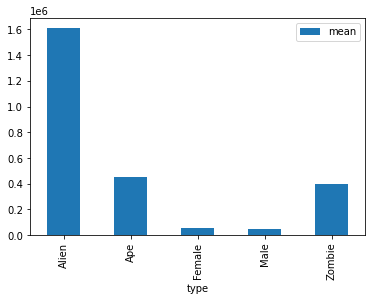

In [11]:
type_skin_sales['amount_$'].describe().plot.bar(y='mean')

In [12]:
type_skin_sales_no_AAZ = sales_humans[sales_humans['date'] >= '2019-01-01'].groupby(['skin','type'])
type_skin_sales_no_AAZ['amount_$'].describe()

count          mean           std  min         25%       50%  \
skin   type                                                                    
Albino Female   440.0  70189.794023  95868.740966  0.0  16040.0750  46273.30   
       Male     824.0  64580.763835  86712.231342  0.0   3844.6675  43231.55   
Dark   Female  1377.0  56593.953508  70291.381708  0.0   1242.3800  39255.10   
       Male    2935.0  54037.692089  83560.983306  0.0    752.8300  34461.50   
Light  Female  1300.0  70559.771800  90344.617298  0.0   3616.9125  43904.90   
       Male    2758.0  61473.300384  93660.046268  0.0   1749.3350  37096.25   
Mid    Female  1375.0  61714.722735  80194.150847  0.0   2509.6800  41520.40   
       Male    2695.0  55811.931295  83015.650585  0.0    938.2000  35639.90   

                     75%        max  
skin   type                          
Albino Female  81643.675   980096.0  
       Male    76672.650   896400.0  
Dark   Female  75105.100   640952.0  
       Male    66165.000  1776130.0  
Light  Female  91023.025   912796.0  
       Male    71459.725  1000940.0  
Mid    Female  80630.500  1328220.0  
       Male    70403.400  1084100.0

<AxesSubplot:xlabel='skin,type'>

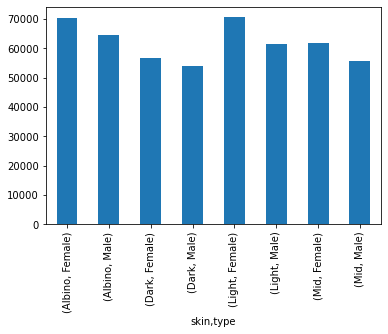

In [13]:
type_skin_sales_no_AAZ['amount_$'].describe().plot.bar(y='mean', legend=False)


### Num de atributos

In [272]:
fig = px.histogram(humans_df, x='traits_counts', width=600, height=500)
fig.show()

In [273]:
humans_df['traits_counts'].describe(percentiles=[.01,.05,.25,.50,.75,.95,.99])

count    9879.000000
mean        2.825590
std         0.909918
min         0.000000
1%          1.000000
5%          2.000000
25%         2.000000
50%         3.000000
75%         3.000000
95%         4.000000
99%         5.000000
max         9.000000
Name: traits_counts, dtype: float64

In [274]:
traits_sales = sales_humans[sales_humans['date'] >= '2019-01-01'].groupby(['traits_counts'])
traits_sales['amount_$'].describe()

,count,mean,std,min,25%,50%,75%,max
traits_counts,,,,,,,,
0,6.0,191884.561667,389998.415225,2566.45,2708.4400,11616.00,112159.25,980096.00
1,150.0,97509.055467,132539.602241,0.00,3880.9700,54957.10,146626.25,701252.00
2,4828.0,60887.782297,81844.439676,0.00,2089.9425,38974.30,76086.30,1084100.00
3,6292.0,54550.621070,80003.642512,0.00,1076.2225,36264.20,67591.40,1328220.00
4,1835.0,59735.974774,81740.154012,0.00,1339.5500,39370.10,75036.60,912796.00
5,518.0,85713.661139,105142.582847,0.00,1681.6600,56913.20,125307.25,996664.00
6,53.0,127221.234906,175820.930717,0.00,1043.4700,47736.90,189931.00,663851.00
7,20.0,171757.905500,409367.024581,0.00,4829.4400,21511.05,114363.50,1776130.00
9,2.0,531.650000,317.010112,307.49,419.5700,531.65,643.73,755.81


<AxesSubplot:xlabel='traits_counts'>

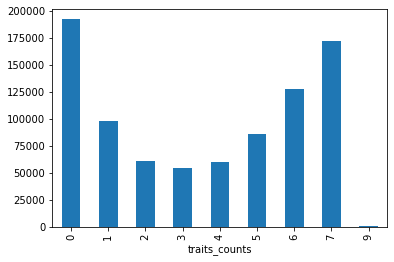

In [275]:
traits_sales['amount_$'].describe().plot.bar(y='mean', legend=False)

In [276]:
sales_humans_2020['traits_counts'] = sales_humans_2020['traits_counts'].astype('object')
fig = px.box(sales_humans_2020, x='amount_$', y='traits_counts', color='traits_counts', notched=False, width=900 )
fig.show()

<ipython-input-276-d58fc2a30850>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [277]:
sales_humans[sales_humans['date'] >= '2019-01-01']

,index,punk_id,trans_type,from,to,amount_ether,amount_$,date,rarity,type,...,'TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair'
17,100010,6401,Sold,0x577eBC,0x561786,19.990000,39866.70,2021-07-14,5693.0,Female,...,0,0,0,0,0,0,0,0,0,0
25,100018,6401,Sold,0x7B5485,0x577ebc,16.980000,70784.50,2021-05-11,5693.0,Female,...,0,0,0,0,0,0,0,0,0,0
41,100032,6401,Sold,0x023EF7,0x7b5485,20.750000,42996.30,2021-04-09,5693.0,Female,...,0,0,0,0,0,0,0,0,0,0
43,100034,6401,Sold,0xaBF107,0x023ef7,18.500000,38334.00,2021-04-09,5693.0,Female,...,0,0,0,0,0,0,0,0,0,0
53,100043,6401,Sold,0xcA8fE4,0xabf107,17.990000,37573.40,2021-04-08,5693.0,Female,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166363,99965,6397,Sold,0x6611fE,0xf0f068,0.550000,77.69,2020-01-08,5996.0,Male,...,0,0,0,0,0,0,0,0,0,0
166367,99969,6398,Sold,0x1919DB,0x602669,18.500000,34686.60,2021-06-22,7801.0,Male,...,0,0,0,0,0,0,0,0,0,0
166371,99972,6398,Sold,0xb78E3E,0x1919db,16.760000,39682.00,2021-06-16,7801.0,Male,...,0,0,0,0,0,0,0,0,0,0
166378,99979,6398,Sold,0x53edE7,0xb78e3e,0.666666,135.30,2020-05-14,7801.0,Male,...,0,0,0,0,0,0,0,0,0,0


### Frecuencias de atributos

In [278]:
traits_frec = humans_df.iloc[:,6:].aggregate('mean')*100
human_traits_frec = traits_frec.sort_values(ascending=False).head(95)
human_traits_frec

'Earring'             24.607754
'Cigarette'            9.606235
'HotLipstick'          7.045247
'PurpleLipstick'       6.630226
'Mole'                 6.498633
                        ...    
'HiddenSmile'          0.323919
'HiddenLipstick'       0.222695
'HiddenHandlebars'     0.050612
'HiddenMustache'       0.030367
'HiddenBuckTeeth'      0.020245
Length: 95, dtype: float64

In [279]:
fig = go.Figure(go.Bar(x=human_traits_frec.index, y=human_traits_frec))
fig.update_layout(
    yaxis_title="Counts", 
    xaxis_title='Traits',
    autosize = True,
    height = 500,
    width = 1200
    )
fig.update_xaxes(tickangle = 70)
fig.show()

In [280]:
traits_counts = sales_humans.iloc[:,12:].aggregate('mean')*100
traits_counts.sort_values(ascending=False)

traits_counts         284.591572
'Earring'              25.863921
'Cigarette'             9.501548
'Mole'                  7.738960
'BlackLipstick'         6.064818
                         ...    
'HiddenSmile'           0.277971
'HiddenLipstick'        0.170573
'HiddenHandlebars'      0.044223
'HiddenMustache'        0.012635
'HiddenBuckTeeth'       0.000000
Length: 96, dtype: float64

### Rarity

In [281]:
fig = px.scatter(sales_humans_2020, x='rarity', y='amount_$', color="type", marginal_x='box', template='simple_white')
fig.show()

In [282]:
sales_humans_2020['traits_counts'] = sales_humans_2020['traits_counts'].astype('object')
fig = px.scatter(sales_humans_2020, x='rarity', y='amount_$', color='traits_counts', size_max=15, width= 800, color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

<ipython-input-282-5837a51a4ecf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [305]:
sales_humans_2020['traits_counts'] = sales_humans_2020['traits_counts'].astype('int')
corr = sales_humans_2020[['amount_$','rarity']]
corr_matrix = corr.corr()
corr_matrix

<ipython-input-305-b438ea9e8763>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,amount_$,rarity
amount_$,1.000000,-0.174968
rarity,-0.174968,1.000000


In [306]:
fig = px.imshow(corr_matrix, width= 500, color_continuous_scale=px.colors.diverging.Armyrose, range_color=[-1,1], )
fig.update_xaxes(side="top")
fig.update_layout(font=dict(size=18))
fig.show()

In [307]:
conv_type ={'Alien': 1, 'Ape': 2, 'Zombie': 3, 'Male':4, 'Female':5}
conv_counts = {9:1,0:2,7:3,6:4,1:5,5:6,4:7,2:8,3:9}
counts_mod=[]
type_mod = []

for item, gen in zip(corr['traits_counts'],corr['type']):
    counts_mod.append(conv_counts[item])
    type_mod.append(conv_type[gen])



KeyError: 'traits_counts'

In [ ]:
corr = sales_humans_2020[['amount_ether','amount_$','rarity','type', 'skin','traits_counts']]
corr['traits_mod'] = counts_mod
corr['types_mod'] = type_mod
corr_matrix = corr.corr()
mask =  np.triu(corr_matrix, k=1) # This will be applied as a mask
corr_matrix

ValueError: Length of values does not match length of index

NameError: name 'figure' is not defined

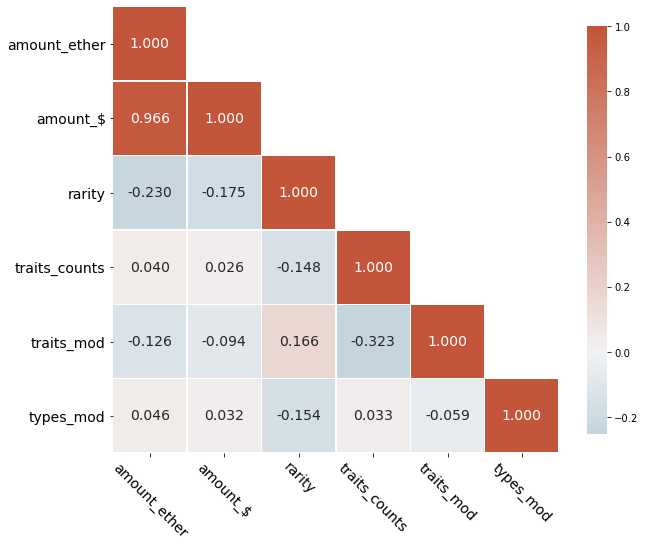

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr_matrix, 
            mask=mask, 
            vmax=1, 
            vmin = -0.25,
            cmap = sns.diverging_palette(230, 20, n=256, as_cmap=True),
            center=0,
            square=True, 
            linewidths=.5,
            annot = True,
            fmt='.3f', 
            annot_kws={'size': 14},
            cbar_kws={"shrink": .75},
            )
ax.tick_params(axis='y',labelsize=14, rotation=-0)
ax.tick_params(axis='x',labelsize=14, rotation=-45)
figure.legend(fontsize=14)
plt.title('')
plt.show()

### Sales

In [286]:
sales_date = sales.groupby('date')
a = sales_date[['amount_ether', 'amount_$']].aggregate(['mean','min', 'max', 'median','count'])
a

amount_ether                                             amount_$  \
                   mean           min       max  median count           mean   
date                                                                           
2017-06-23     0.040000  1.000000e-02     0.100   0.025     4      13.670000   
2017-06-24     0.180314  2.000000e-10     0.980   0.150    35      58.366000   
2017-06-25     0.166359  5.000000e-02     0.335   0.150    16      50.446875   
2017-06-26     0.134635  1.000000e-06     0.420   0.050    17      36.711176   
2017-06-27     0.224927  1.000000e-18     1.000   0.150    35      65.922571   
...                 ...           ...       ...     ...   ...            ...   
2021-08-21    65.706190  4.000000e+01   167.000  56.440    42  211973.642857   
2021-08-22    65.047485  5.108000e+01   179.990  53.900    33  210891.424242   
2021-08-23    78.024663  0.000000e+00   275.000  69.000   350  258983.945714   
2021-08-24   108.045810  6.666000e+01  1600.000  80.000   105  342770.571429   
2021-08-25    83.968000  7.600000e+01    97.950  82.000     5  270789.600000   

                                                     
                  min         max      median count  
date                                                 
2017-06-23       3.42       34.17       8.545     4  
2017-06-24       0.00      317.22      48.550    35  
2017-06-25      15.16      101.59      45.490    16  
2017-06-26       0.00      114.53      13.630    17  
2017-06-27       0.00      293.09      43.960    35  
...               ...         ...         ...   ...  
2021-08-21  129043.00   538756.00  182080.000    42  
2021-08-22  165607.00   583548.00  174750.000    33  
2021-08-23       0.00   912796.00  229029.000   350  
2021-08-24  211476.00  5075930.00  253796.000   105  
2021-08-25  245094.00   315880.00  264443.000     5  

[1132 rows x 10 columns]

In [287]:
eth_hist = pd.read_csv('./CSV/ETH_historical_prices_2017_2021.csv')
eth_hist = eth_hist[(eth_hist['Date']>= '2017-06-23') & (eth_hist['Date']<= '2021-08-25')]
eth_hist

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
22,22,2017-06-23,336.484985,348.006012,334.989990,341.739014,341.739014,5.932070e+08
23,23,2017-06-24,341.625000,343.621002,322.087006,323.696014,323.696014,6.735850e+08
24,24,2017-06-25,323.466003,332.791992,284.645996,303.247986,303.247986,1.186880e+09
25,25,2017-06-26,302.954987,311.458008,238.649002,272.691986,272.691986,2.081810e+09
26,26,2017-06-27,272.691986,293.088013,227.136993,293.088013,293.088013,1.973870e+09
...,...,...,...,...,...,...,...,...
1542,1542,2021-08-21,3286.931641,3307.351563,3209.866211,3226.083984,3226.083984,1.811398e+10
1543,1543,2021-08-22,3226.227295,3272.733154,3142.007080,3242.115479,3242.115479,1.598328e+10
1544,1544,2021-08-23,3241.357422,3373.384277,3235.851318,3319.257324,3319.257324,2.051111e+10
1545,1545,2021-08-24,3324.855469,3358.688232,3154.121338,3172.456299,3172.456299,2.013103e+10


In [288]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=a.index, y=a['amount_ether','mean'], name='Ether Mean',
                         line=dict(color='firebrick', width=1.3)))
# fig.add_trace(go.Scatter(x=a.index, y=a['amount_ether','max'], mode='lines', marker=dict(color='firebrick'),
#                          line=dict(width=0), showlegend=False))
# fig.add_trace(go.Scatter(x=a.index, y=a['amount_ether','min'], mode='lines', marker=dict(color='firebrick'),
#                          line=dict(width=0),fill='tonexty', showlegend=False))


fig.add_trace(go.Scatter(x=a.index, y=a['amount_$','mean'], name='$ Mean',
                         line = dict(color='royalblue', width=1.3),yaxis='y3'))
# fig.add_trace(go.Scatter(x=a.index, y=a['amount_$','max'], mode='lines', marker=dict(color='royalblue'),
#                          line=dict(width=0), showlegend=False,yaxis='y3'))
# fig.add_trace(go.Scatter(x=a.index, y=a['amount_$','min'], mode='lines', marker=dict(color='royalblue'),
#                          line=dict(width=0), fill='tonexty', showlegend=False, yaxis='y3'))


fig.add_trace(go.Scatter(x=eth_hist['Date'], y=eth_hist['Close'], name='exchange_rate',
                         line = dict(color='orange', width=1.3), yaxis='y2'))
                    


# Edit the layout
fig.update_layout(title='Punk Sales',
                   xaxis_title='Date',
                   yaxis=dict(title="Amount ETH (log)", titlefont=dict(color="firebrick"), tickfont=dict(color="firebrick")),
                   yaxis2=dict(title="Exchange rate (log)",titlefont=dict(color="orange"),tickfont=dict(color="orange"),
        anchor="x",
        overlaying="y",
        side="right"),
                   yaxis3=dict(title="Amount $ (log)",titlefont=dict(color="royalblue"),tickfont=dict(color="royalblue"),
        anchor="free",
        overlaying="y",
        side="right",
        position=0.001),
        width=1000,
        legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
)
    )
    
fig.update_yaxes(automargin=True)

fig.update_yaxes(type='log')
fig.show()

In [289]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=a.index, y=a['amount_ether','count'], name='Sales',
                         line=dict(color='black', width=1.3)))

fig.add_trace(go.Scatter(x=eth_hist['Date'], y=eth_hist['Close'], name='exchange_rate',
                         line = dict(color='orange', width=1.3), yaxis='y2'))                   
                    

# Edit the layout
fig.update_layout(title='Evolution of Punk Sales Counts and US$/ETH Exchange rate',
                   xaxis_title='Date',
                   yaxis=dict(title="Sales count", titlefont=dict(color="black"), tickfont=dict(color="black"),anchor="x"),
                   yaxis2=dict(title="Exchange rate",titlefont=dict(color="orange"),tickfont=dict(color="orange"),
        anchor="x",
        overlaying="y",
        side="right",
        position=0.2),
        width=1000,
        legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
)
    )
    
fig.update_yaxes(automargin=True)

#fig.update_yaxes(type='log')
fig.show()

In [290]:
# EVOLUCION EN LOS PRECIOS DE COMPRA DE LOS PUNKS

top_sold = sales.groupby('punk_id').aggregate('count').sort_values('from', ascending=False).head(100)
top_sold

,index,trans_type,from,to,amount_ether,amount_$,date,rarity,type,skin,...,'TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair'
punk_id,,,,,,,,,,,,,,,,,,,,,
3914,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
6989,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
2937,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
7392,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
6788,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
9856,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
3771,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


In [291]:
top_sold = sales[sales['punk_id'].isin(top_sold.index)]
top_sold['date'] = top_sold['date'].astype('datetime64')

<ipython-input-291-1004a3199d0d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [292]:
fig = px.scatter(top_sold[top_sold['date'] > '2019-12-31'], x='date', y='amount_$', color="rarity", template='simple_white', trendline='lowess')

fig.update_layout( xaxis_title='Date', 
    width=1000,
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
)
    )
fig.show()

### Owners

In [293]:
punks_basic['Owned_by'].value_counts().head(10)

0xC352B5    430
0xa25803    261
0xB88F61    215
0x577eBC    191
0x69021A    147
Opensea     146
0xCC7C33    144
0x26f744    141
0x6F4A2d    126
0xCffC33    126
Name: Owned_by, dtype: int64

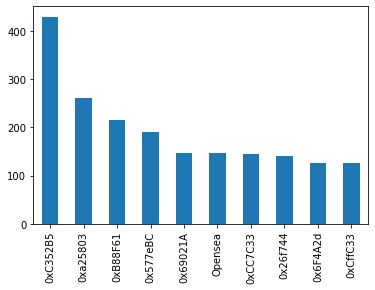

In [294]:
punks_basic['Owned_by'].value_counts().head(10).plot.bar(sharey=False)
owners_cumulative = 100*(punks_basic['Owned_by'].value_counts().cumsum()/punks_basic['Owned_by'].value_counts().sum())


In [295]:
z = punks_basic['Owned_by'].value_counts() 
z


0xC352B5    430
0xa25803    261
0xB88F61    215
0x577eBC    191
0x69021A    147
           ... 
0xC88542      1
0xC2e931      1
0xB596b6      1
0xda022d      1
0x3950Cf      1
Name: Owned_by, Length: 2933, dtype: int64

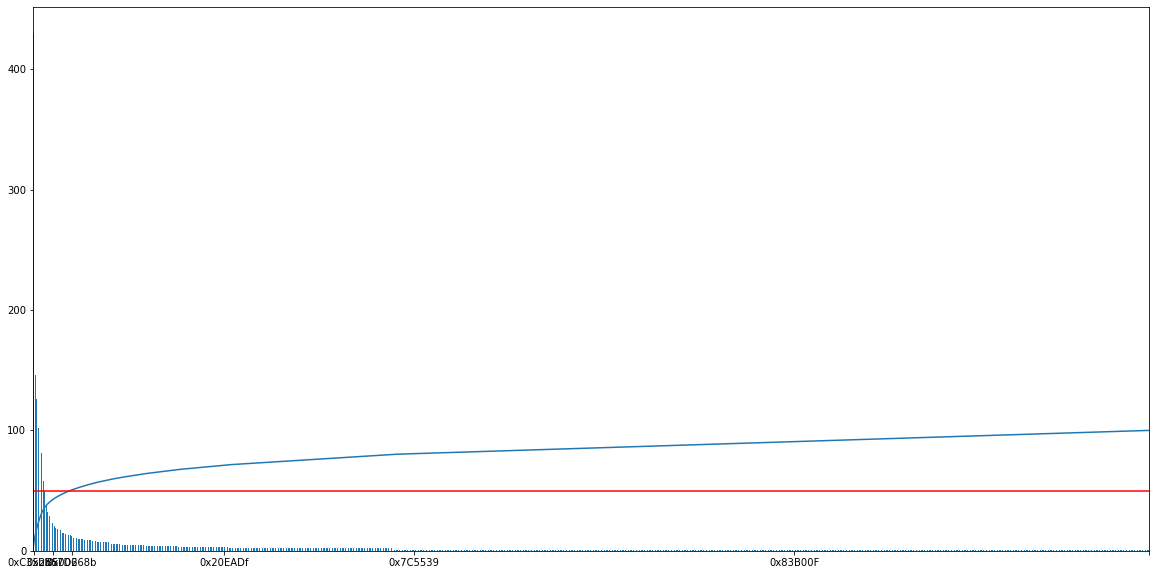

In [296]:
punks_basic['Owned_by'].value_counts().plot.bar(use_index=True, figsize=(20,10), xticks=[0,50,100,500,1000,2000,len(punks_basic['Owned_by'].value_counts())])
owners_cumulative.plot.line(use_index=True)
plt.axhline(y=50, color='r', linestyle='-')

In [297]:
topowners = punks_basic['Owned_by'].value_counts()
cumulative = 100*(punks_basic['Owned_by'].value_counts().cumsum()/punks_basic['Owned_by'].value_counts().sum())

cumulative

0xC352B5      4.30
0xa25803      6.91
0xB88F61      9.06
0x577eBC     10.97
0x69021A     12.44
             ...  
0xC88542     99.96
0xC2e931     99.97
0xB596b6     99.98
0xda022d     99.99
0x3950Cf    100.00
Name: Owned_by, Length: 2933, dtype: float64

In [298]:
from plotly.subplots import make_subplots

subfig = make_subplots(specs=[[{"secondary_y": True}]])
fig = px.bar(topowners, y='Owned_by', template='simple_white', title='Punks amount', color="Owned_by", color_continuous_scale=px.colors.sequential.Viridis)
fig2 = px.line(x=owners_cumulative.index, y=owners_cumulative.values)

fig2.update_traces(yaxis="y2")
subfig.add_traces(fig.data + fig2.data)

subfig.layout.xaxis.title="Owners Amount"
subfig.layout.xaxis.tickvals=[0,100,500,1000,1500,2000,2500]
subfig.layout.xaxis.ticktext=['0','100','500','1000','1500','2000','2500']
subfig.layout.yaxis.title="Punks Amount"
# subfig.layout.yaxis.type="log"
subfig.layout.yaxis2.title="Punks Cumulative (%)"
# recoloring is necessary
subfig.update_layout(
    xaxis_tickangle=-45,
    width=1000,)
subfig.show()

In [299]:
topowners = pd.DataFrame(topowners)
topowners

,Owned_by
0xC352B5,430
0xa25803,261
0xB88F61,215
0x577eBC,191
0x69021A,147
...,...
0xC88542,1
0xC2e931,1
0xB596b6,1
0xda022d,1


In [300]:

fig = go.Figure()
# Create and style traces
fig.add_trace(go.bar(x=topowners.index, y=topowners.Owned_by, name='Punks por propierario'))
fig.add_trace(go.Scatter(x=owners_cumulative.index, y=owners_cumulative.values, name='valor acumulado (%)', line = dict(color='orange', width=1.3), yaxis='y2'))                   
                    

# Edit the layout
fig.update_layout(title='Evolution of Punk Sales Counts and US$/ETH Exchange rate',
                   xaxis_title='Date',
                   yaxis=dict(title="Sales count", titlefont=dict(color="black"), tickfont=dict(color="black"),anchor="x"),
                   yaxis2=dict(title="Exchange rate",titlefont=dict(color="orange"),tickfont=dict(color="orange"),
        anchor="x",
        overlaying="y",
        side="right",
        position=0.2),
        width=1000,
        legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
)
    )
    
fig.update_yaxes(automargin=True)

#fig.update_yaxes(type='log')
fig.show()

TypeError: 'module' object is not callable

Hay compradores que acumulan muchos punks. El que más tiene son 430 y ebtre los 100 primeros owners con más punks acaparan el 50% de los punks

In [ ]:
# Buscamos los owners que acumulan el 50% de los punks
top_owners = owners_cumulative[owners_cumulative.values < 50.1]

#Generamos un dataframe con los datos de los punks de estos owners
top_owners = punks[punks['Owned_by'].isin(top_owners.index)]
top_owners

,Rarity,Genre,Skin,Traits,traits_counts,Owned_by,'Bandana','Beanie','BigBeard','BigShades',...,'TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair'
Punk_id,,,,,,,,,,,,,,,,,,,,,
1,4352,Male,Dark,"'Mohawk', 'Smile'",2,0xB88F61,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7896,Male,Dark,"'NerdGlasses', 'Pipe', 'WildHair'",3,0xC352B5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,7332,Male,Mid,"'BigShades', 'Earring', 'Goat', 'WildHair'",4,0xC352B5,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,1960,Female,Mid,"'Earring', 'HalfShaved', 'PurpleEyeShadow', 'H...",4,Opensea,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7425,Male,Mid,'Do-rag',1,0xC352B5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,72,Male,Light,"'Beanie', 'Earring', 'Muttonchops', 'RegularSh...",4,0x062C54,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9992,4248,Male,Mid,"'Bandana', 'Chinstrap', 'Smile'",3,0xCffC33,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9993,8164,Male,Dark,"'Cap', 'NerdGlasses', 'ShadowBeard'",3,0xCffC33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fig = px.sunburst(top_owners, path=['Genre', 'Skin'], color='Skin')
fig.show()

In [ ]:
top_10 = punks_basic['Owned_by'].value_counts().head(10)
top_10 = punks[punks['Owned_by'].isin(top_10.index)]
top_10

,Rarity,Genre,Skin,Traits,traits_counts,Owned_by,'Bandana','Beanie','BigBeard','BigShades',...,'TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair'
Punk_id,,,,,,,,,,,,,,,,,,,,,
1,4352,Male,Dark,"'Mohawk', 'Smile'",2,0xB88F61,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7896,Male,Dark,"'NerdGlasses', 'Pipe', 'WildHair'",3,0xC352B5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,7332,Male,Mid,"'BigShades', 'Earring', 'Goat', 'WildHair'",4,0xC352B5,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,1960,Female,Mid,"'Earring', 'HalfShaved', 'PurpleEyeShadow', 'H...",4,Opensea,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7425,Male,Mid,'Do-rag',1,0xC352B5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,7716,Male,Dark,"'Mohawk', 'Muttonchops'",2,0xCffC33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9988,3465,Male,Mid,"'GoldChain', 'MessyHair'",2,0xCffC33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9992,4248,Male,Mid,"'Bandana', 'Chinstrap', 'Smile'",3,0xCffC33,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fig = px.sunburst(top_10, path=['Genre', 'Skin'], color='Skin')
fig.show()

In [ ]:
sales_aaz.iloc[:,6:]

,amount_$,date,rarity,type,skin,traits,traits_counts,'Bandana','Beanie','BigBeard',...,'TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair'
5942,2054330.00,2021-07-31,503.0,Zombie,Zombie,"'CrazyHair', 'FrontBeardDark'",2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5955,1071430.00,2021-07-29,503.0,Zombie,Zombie,"'CrazyHair', 'FrontBeardDark'",2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5978,61795.70,2021-01-23,503.0,Zombie,Zombie,"'CrazyHair', 'FrontBeardDark'",2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5989,56577.60,2021-01-18,503.0,Zombie,Zombie,"'CrazyHair', 'FrontBeardDark'",2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6002,22890.10,2020-12-26,503.0,Zombie,Zombie,"'CrazyHair', 'FrontBeardDark'",2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157740,12367.70,2020-09-06,538.0,Zombie,Zombie,'Mohawk',1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160611,2746.01,2017-07-01,17.0,Alien,Alien,"'Earring', 'KnittedCap'",2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161670,2196.26,2018-01-15,48.0,Ape,Ape,"'Cap', 'Cigarette', 'Earring'",3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164760,1210440.00,2021-07-06,481.0,Zombie,Zombie,"'Cigarette', 'NerdGlasses', 'TopHat'",3,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
fig = px.scatter(sales_aaz, x="amount_$", y='rarity', size='traits_counts', color='type', width=800)
fig.show()

In [ ]:
fig = px.histogram(aaz_df, x='traits_counts', width=600, height=500)
fig.show()